In [1]:
import tensorflow as tf

In [2]:
mt = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mt.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

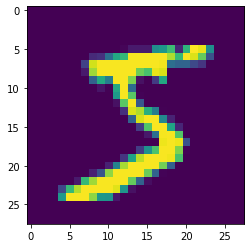

In [8]:
plt.imshow(x_train[0])
plt.show()

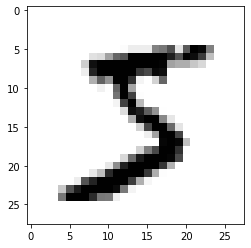

In [10]:
# plt.cm.binary -> Cm is the colormap
plt.imshow(x_train[0],cmap = plt.cm.binary)

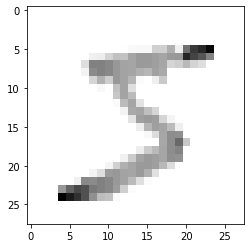

In [43]:
# Pre-processing data
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [44]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [45]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [47]:
# Neural Network
model = Sequential() 

# First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_13 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)         

In [49]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [50]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 72s 54ms/step - loss: 0.6581 - accuracy: 0.7812 - val_loss: 0.1287 - val_accuracy: 0.9587
Epoch 2/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.1171 - accuracy: 0.9649 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 3/5
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0829 - val_accuracy: 0.9738
Epoch 4/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0619 - val_accuracy: 0.9818
Epoch 5/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0472 - accuracy: 0.9857 - val_loss: 0.0754 - val_accuracy: 0.9783


In [51]:
len(y_train)

60000

In [52]:
test_loss,test_acc = model.evaluate(x_testr,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0675 - accuracy: 0.9807


In [53]:
predictions = model.predict([x_testr])

In [54]:
print(predictions)

[[1.8912542e-07 2.8362606e-06 1.3892735e-05 ... 9.9998045e-01
  8.7151690e-08 1.4987878e-06]
 [9.9907875e-06 5.0853737e-06 9.9996972e-01 ... 6.3832618e-07
  1.5590023e-06 1.1836039e-06]
 [4.8671927e-07 9.9997556e-01 1.3782149e-05 ... 1.3968333e-06
  4.8069842e-07 2.0024556e-06]
 ...
 [2.0233001e-08 2.4533681e-06 7.0238816e-06 ... 2.1863743e-06
  8.0345967e-07 2.0722735e-04]
 [2.9818050e-06 2.9916887e-08 9.1431760e-09 ... 1.1802104e-08
  4.0893821e-05 4.1896765e-06]
 [1.4330301e-05 6.0624603e-07 8.9421090e-05 ... 3.6274870e-09
  2.0772763e-05 2.4688704e-06]]


In [56]:
print(np.argmax(predictions[0]))

7


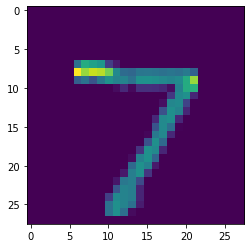

In [57]:
plt.imshow(x_test[0])

7


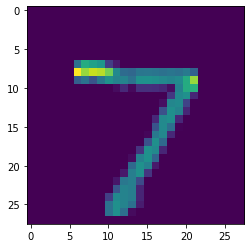

2


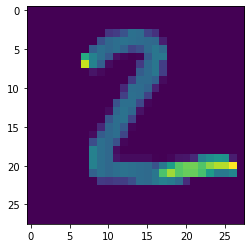

1


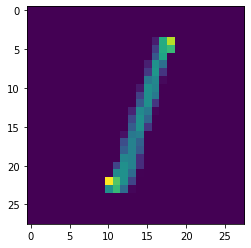

0


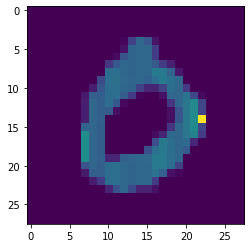

4


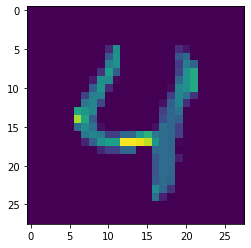

1


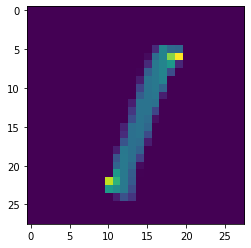

4


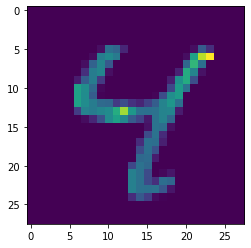

9


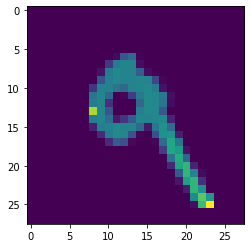

5


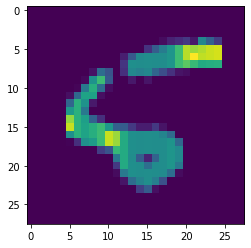

9


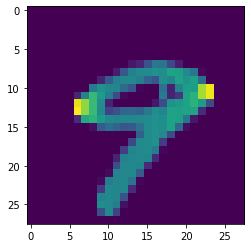

In [61]:
for i in range(10):
    print(np.argmax(predictions[i]))
    plt.imshow(x_test[i])
    plt.show()

In [62]:
import cv2

In [83]:
img=cv2.imread('1.png')

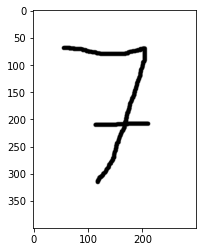

In [84]:
plt.imshow(img)

In [66]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [67]:
gray.shape

(400, 300)

In [72]:
reimg = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [73]:
newimg = tf.keras.utils.normalize(reimg,axis=1)
newimg.shape

(28, 28)

In [74]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [75]:
prediction = model.predict(newimg)

In [76]:
# It couldn't predict seven. Maybe that extra dash caused that error
print(np.argmax(prediction))

2


In [85]:
img=cv2.imread('2.png')

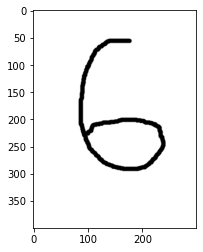

In [86]:
plt.imshow(img)

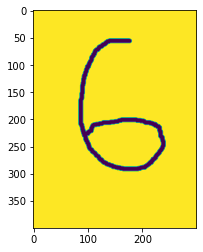

In [88]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [89]:
reimg = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [90]:
newimg = tf.keras.utils.normalize(reimg,axis=1)
newimg.shape

(28, 28)

In [91]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [92]:
prediction = model.predict(newimg)

In [93]:
# It could predict this well
print(np.argmax(prediction))

6
